In [1]:
import numpy as np
import pandas as pd
import kagglehub
import os
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Ridge Regression

# Salary

In [2]:
path = kagglehub.dataset_download("harsh45/random-salary-data-of-employes-age-wise")
print("Path to dataset files:", path)

dataset_path = path + "/Salary_Data.csv"
data = pd.read_csv(dataset_path)


Path to dataset files: /root/.cache/kagglehub/datasets/harsh45/random-salary-data-of-employes-age-wise/versions/1


In [3]:
print("Dataset columns:", data.columns)
print(data.head())

X2 = data['YearsExperience'].values.reshape(-1, 1)
y2 = data['Salary'].values


Dataset columns: Index(['YearsExperience', 'Salary'], dtype='object')
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [4]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_scaled, X_mean, X_std = standardize(X2)

In [5]:
def ridge_regression(X, y, lambda_value):
    X_T = X.T
    identity = np.identity(X.shape[1])
    regularization_term = lambda_value * identity
    ridge_matrix = np.matmul(X_T, X) + regularization_term
    w = np.matmul(np.linalg.pinv(ridge_matrix), np.dot(X_T, y))
    bias = np.mean(y) - np.dot(np.mean(X, axis=0), w)
    return w, bias

In [6]:
def evaluate_mse(X_train, y_train, X_test, y_test, lambda_value):
    w, bias = ridge_regression(X_train, y_train, lambda_value)
    predictions = np.dot(X_test, w) + bias
    mse = np.mean((y_test - predictions) ** 2)
    return mse

In [7]:
def k_fold_cross_validation(X, y, lambdas, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_values = {lambda_value: [] for lambda_value in lambdas}
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for lambda_value in lambdas:
            mse = evaluate_mse(X_train, y_train, X_test, y_test, lambda_value)
            mse_values[lambda_value].append(mse)
    avg_mse_values = {lambda_value: np.mean(mse_list) for lambda_value, mse_list in mse_values.items()}
    optimal_lambda = min(avg_mse_values, key=avg_mse_values.get)
    return optimal_lambda, avg_mse_values


In [8]:
lambdas = np.logspace(-5, 1, 9)
optimal_lambda_from_scratch, avg_mse_values_scratch = k_fold_cross_validation(X_scaled, y2, lambdas)

print(f"Optimal lambda (from-scratch): {optimal_lambda_from_scratch}")

ridge_sklearn = Ridge(alpha=optimal_lambda_from_scratch)
ridge_sklearn.fit(X_scaled, y2)
predictions_sklearn = ridge_sklearn.predict(X_scaled)
mse_sklearn = np.mean((y2 - predictions_sklearn) ** 2)
print(f"Optimal lambda (sklearn): {ridge_sklearn.alpha}")
print(f'MSE (from-scratch): {avg_mse_values_scratch[optimal_lambda_from_scratch]}')
print(f'MSE (sklearn): {mse_sklearn}')

Optimal lambda (from-scratch): 1.7782794100389228
Optimal lambda (sklearn): 1.7782794100389228
MSE (from-scratch): 153838229.7706959
MSE (sklearn): 33447993.1324752


# Housing

In [9]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [10]:
import os
import pandas as pd
dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)
dataset_path = path + "/Housing.csv"
data = pd.read_csv(dataset_path)
print(data.head())


Dataset files: ['Housing.csv']
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [11]:
X = data.drop(columns=['price']).values
y = data['price'].values

In [12]:
categorical_columns = ['mainroad', 'guestroom', 'basement',
                       'hotwaterheating', 'airconditioning',
                       'prefarea', 'furnishingstatus']

label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [13]:
print(data.shape)
print(data.isnull().sum())


(545, 13)
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [14]:
data = pd.read_csv(dataset_path)
categorical_columns = ['mainroad', 'guestroom', 'basement',
                       'hotwaterheating', 'airconditioning',
                       'prefarea', 'furnishingstatus']
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
X = data.drop(columns=['price']).values
y = data['price'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape of X_scaled: {X_scaled.shape}")
print(f"Shape of y: {y.shape}")


Shape of X_scaled: (545, 12)
Shape of y: (545,)


In [15]:
lambdas = np.logspace(-5, 1, 9)
optimal_lambda_from_scratch, avg_mse_values_scratch = k_fold_cross_validation(X_scaled, y, lambdas)
print(f"Optimal lambda (from-scratch): {optimal_lambda_from_scratch}")

ridge_sklearn = Ridge(alpha=optimal_lambda_from_scratch)
ridge_sklearn.fit(X_scaled, y)
predictions_sklearn = ridge_sklearn.predict(X_scaled)
mse_sklearn = np.mean((y - predictions_sklearn) ** 2)

print(f"Optimal lambda (sklearn): {ridge_sklearn.alpha}")
print(f'MSE (from-scratch): {avg_mse_values_scratch[optimal_lambda_from_scratch]}')
print(f'MSE (sklearn): {mse_sklearn}')

Optimal lambda (from-scratch): 10.0
Optimal lambda (sklearn): 10.0
MSE (from-scratch): 1340472302491.9648
MSE (sklearn): 1117458845860.744


# Lasso

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [17]:
df = pd.read_csv('/content/Salary_Data.csv')

In [18]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
X = df.iloc[:, :-1]
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [20]:
X = X.to_numpy()
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [21]:
Y = df.iloc[:, -1]
Y.head()


,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [22]:
Y = Y.to_numpy()
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [24]:
cols = X.shape[1]
cols

1

In [25]:
W = np.zeros(cols)
W

array([0.])

In [26]:
b = 0

In [27]:
xtrain ,xtest, ytrain, ytest = train_test_split(X,Y, test_size=1/3, random_state=0)

In [28]:
def lasso(learning_rate, l1, iterations):
  iterations = int(iterations)
  W0 = W
  b0 = b
  for i in range(iterations):
    Y_hat  =  np.dot(xtrain, W0)+b0
    W_change = np.zeros(W0.shape)
    for j in range(cols):
      if W0[j]>0:
        W_change[j] = (2 *((xtrain[:,j]).dot(Y_hat - ytrain)) + (l1) ) /xtrain.shape[0]

      if W0[j]<0:
        W_change[j] = (2 *((xtrain[:,j]).dot(Y_hat - ytrain)) - (l1) ) /xtrain.shape[0]

      if W0[j]==0:
        W_change[j] = (2 *((xtrain[:,j]).dot(Y_hat - ytrain)) ) /xtrain.shape[0]

    b_change = (2 * np.sum(Y_hat - ytrain)) / xtrain.shape[0]

    W0 = W0 - learning_rate * W_change
    b0 = b0 - learning_rate * b_change

  return W0, b0

In [29]:
def kfold_indices(data_size, k):
    indices = np.arange(data_size)
    np.random.seed(42)
    np.random.shuffle(indices)
    fold_size = data_size // k
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [30]:
def cross_validate_lasso(X, y, lambdas,k):
    folds = kfold_indices(len(X), k)
    errors = []
    for lambda_value in lambdas:
        fold_errors =[]
        for train_index, val_index in folds:
            X_train,X_val = X[train_index], X[val_index]
            y_train,y_val = y[train_index], y[val_index]
            w,b = lasso(learning_rate=0.01, l1=lambda_value, iterations=100)
            predictions = np.dot(X_val, w)+b
            mse = np.mean((y_val - predictions) ** 2)
            fold_errors.append(mse)
        errors.append(np.mean(fold_errors))
    return errors


In [31]:
W, b = lasso(learning_rate=0.01, l1=0.1, iterations=200)

In [32]:
y_pred = xtest.dot(W) +b

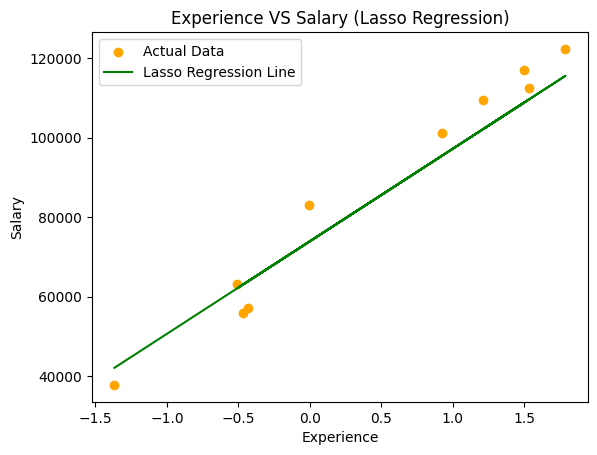

In [33]:
plt.scatter(xtest, ytest, label='Actual Data', color='Orange')
plt.plot(xtest, y_pred, label="Lasso Regression Line", color="Green")
plt.title('Experience VS Salary (Lasso Regression)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [34]:
y_pred = xtest.dot(W) +b

mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error from scratch:", mse)

lasso_built_in = Lasso(alpha=0.1)
lasso_built_in.fit(xtrain, ytrain)

y_pred_built_in = lasso_built_in.predict(xtest)

mse = mean_squared_error(ytest, y_pred_built_in)
print("Mean Squared Error built in:", mse)


Mean Squared Error from scratch: 40634782.39975862
Mean Squared Error built in: 21026177.177518718


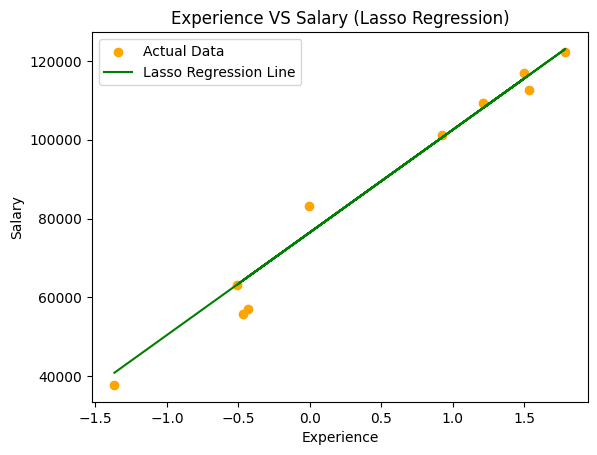

In [35]:
# using built in

ytest_sample = ytest
y_pred_sample = y_pred_built_in

plt.scatter(xtest, ytest_sample, label='Actual Data', color='Orange')
plt.plot(xtest, y_pred_sample, label="Lasso Regression Line", color="Green")
plt.title('Experience VS Salary (Lasso Regression)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [36]:
lambdas = np.logspace(-3, 3, 100)
k = 5

lasso_errors = cross_validate_lasso(X, Y, lambdas, k)

optimal_lambda = lambdas[np.argmin(lasso_errors)]
print(f"Optimal lambda (from-scratch): {optimal_lambda}")

cv_errors = []
scaler = StandardScaler()
X_scaled_sklearn = scaler.fit_transform(X)

for alpha in lambdas:
    lasso_built = Lasso(alpha=alpha, max_iter=100)
    scores = cross_val_score(lasso_built, X_scaled_sklearn, Y, cv=k, scoring='neg_mean_squared_error')
    cv_errors.append(-scores.mean())

optimal_lambda_sklearn = lambdas[np.argmin(cv_errors)]
print(f"Optimal lambda (sklearn): {optimal_lambda_sklearn}")

Optimal lambda (from-scratch): 0.001
Optimal lambda (sklearn): 1000.0


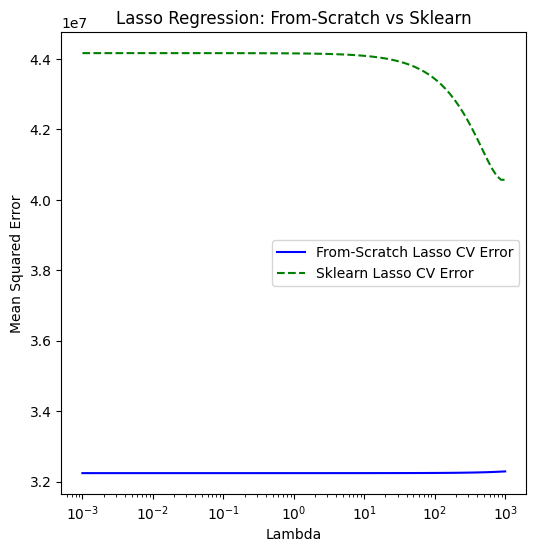

In [37]:
# Plot the cross-validation errors
plt.figure(figsize=(6, 6))
plt.plot(lambdas, lasso_errors, label='From-Scratch Lasso CV Error', color='b')
plt.plot(lambdas, cv_errors, label='Sklearn Lasso CV Error', color='g', linestyle='dashed')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: From-Scratch vs Sklearn')
plt.legend()
plt.show()


dataset 2

In [38]:
df = pd.read_csv('/content/Housing.csv')

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


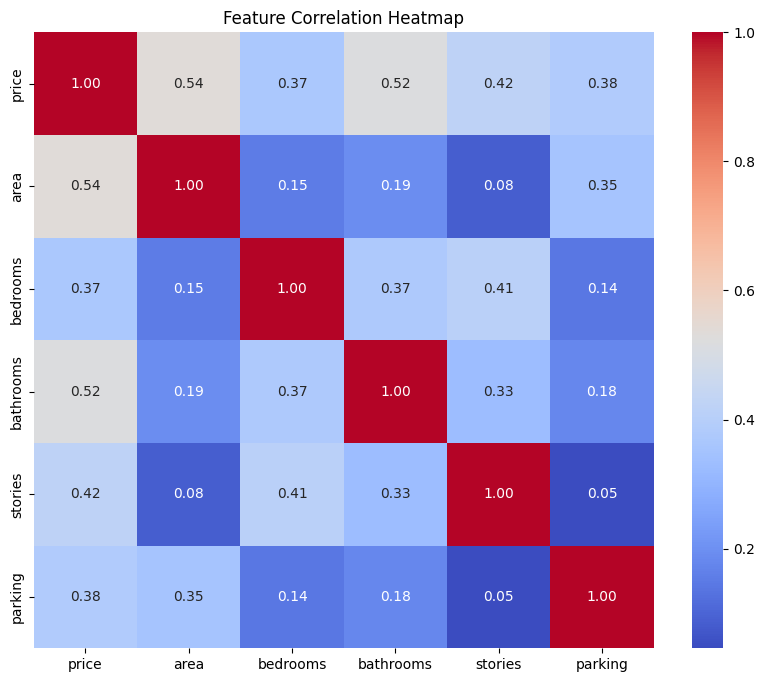

In [40]:
import seaborn as sns
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [41]:
Y = df.iloc[:, 0]
Y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [42]:
Y = Y.to_numpy()

In [43]:
X = df[['area', 'bathrooms','stories','parking','bedrooms']]
X.head()

,area,bathrooms,stories,parking,bedrooms
0,7420,2,3,2,4
1,8960,4,4,3,4
2,9960,2,2,2,3
3,7500,2,2,3,4
4,7420,1,2,2,4


In [44]:
X = X.to_numpy()
X

array([[7420,    2,    3,    2,    4],
       [8960,    4,    4,    3,    4],
       [9960,    2,    2,    2,    3],
       ...,
       [3620,    1,    1,    0,    2],
       [2910,    1,    1,    0,    3],
       [3850,    1,    2,    0,    3]])

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.04672629,  1.42181174,  1.37821692,  1.51769249,  1.40341936],
       [ 1.75700953,  5.40580863,  2.53202371,  2.67940935,  1.40341936],
       [ 2.21823241,  1.42181174,  0.22441013,  1.51769249,  0.04727831],
       ...,
       [-0.70592066, -0.57018671, -0.92939666, -0.80574124, -1.30886273],
       [-1.03338891, -0.57018671, -0.92939666, -0.80574124,  0.04727831],
       [-0.5998394 , -0.57018671,  0.22441013, -0.80574124,  0.04727831]])

In [46]:
cols = X.shape[1]
cols

5

In [47]:
W = np.zeros(cols)
W

array([0., 0., 0., 0., 0.])

In [48]:
b = 0

In [49]:
xtrain ,xtest, ytrain, ytest = train_test_split(X,Y, test_size=1/3, random_state=0)

In [50]:
W, b = lasso(learning_rate=0.01, l1=0.1, iterations=int(10000))

In [51]:
y_pred = xtest.dot(W) +b

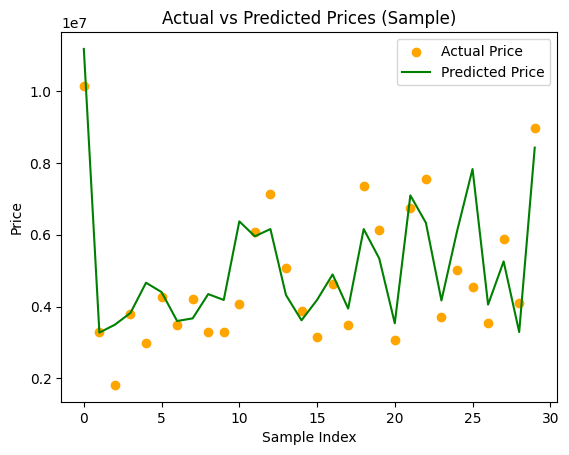

In [52]:
import numpy as np
import matplotlib.pyplot as plt

sample_size = 30
sample_indices = np.random.choice(len(ytest), size=sample_size, replace=False)
ytest_sample = ytest[sample_indices]
y_pred_sample = y_pred[sample_indices]

plt.scatter(range(len(ytest_sample)), ytest_sample, label="Actual Price", color="orange")
plt.plot(range(len(y_pred_sample)), y_pred_sample, label="Predicted Price", color="green")
plt.title('Actual vs Predicted Prices (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [53]:
y_pred = xtest.dot(W) +b

mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error from scratch:", mse)

lasso_built_in = Lasso(alpha=0.1)
lasso_built_in.fit(xtrain, ytrain)

y_pred_built_in = lasso_built_in.predict(xtest)

mse = mean_squared_error(ytest, y_pred_built_in)
print("Mean Squared Error built in:", mse)


Mean Squared Error from scratch: 1239484566349.5667
Mean Squared Error built in: 1239484544545.601


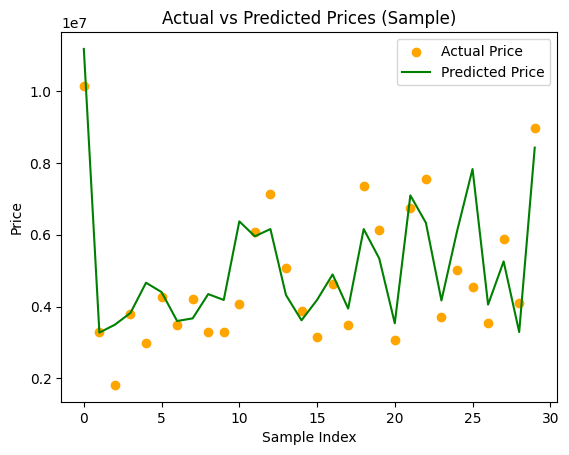

In [54]:
# using built-in function
sample_size = 30

ytest_sample = ytest[sample_indices]
y_pred_sample = y_pred_built_in[sample_indices]

plt.scatter(range(len(ytest_sample)), ytest_sample, label="Actual Price", color="orange")
plt.plot(range(len(y_pred_sample)), y_pred_sample, label="Predicted Price", color="green")
plt.title('Actual vs Predicted Prices (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [55]:
lambdas = np.logspace(-3, 3, 100)
k = 5

lasso_errors = cross_validate_lasso(X, Y, lambdas, k)

optimal_lambda = lambdas[np.argmin(lasso_errors)]
print(f"Optimal lambda (from-scratch): {optimal_lambda}")

cv_errors = []
scaler = StandardScaler()
X_scaled_sklearn = scaler.fit_transform(X)

for alpha in lambdas:
    lasso = Lasso(alpha=alpha, max_iter=100)
    scores = cross_val_score(lasso, X_scaled_sklearn, Y, cv=k, scoring='neg_mean_squared_error')
    cv_errors.append(-scores.mean())

optimal_lambda_sklearn = lambdas[np.argmin(cv_errors)]
print(f"Optimal lambda (sklearn): {optimal_lambda_sklearn}")

Optimal lambda (from-scratch): 1000.0
Optimal lambda (sklearn): 0.003511191734215131


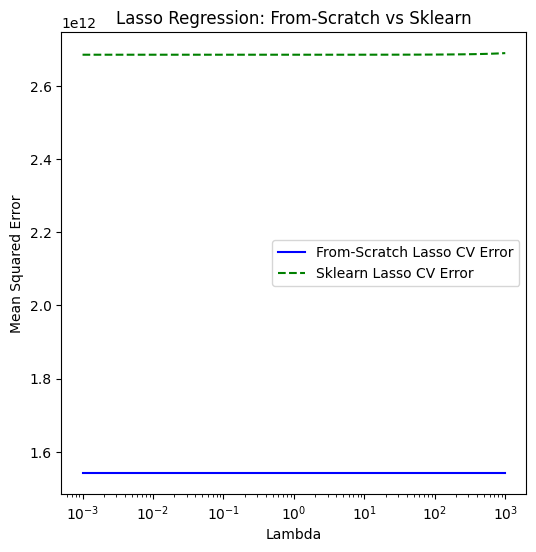

In [56]:
# Plot the cross-validation errors
plt.figure(figsize=(6, 6))
plt.plot(lambdas, lasso_errors, label='From-Scratch Lasso CV Error', color='b')
plt.plot(lambdas, cv_errors, label='Sklearn Lasso CV Error', color='g', linestyle='dashed')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: From-Scratch vs Sklearn')
plt.legend()
plt.show()


# 3- Elastic

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [58]:
df = pd.read_csv('/content/Salary_Data.csv')

In [59]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [60]:
X = df.iloc[:, :-1]
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [61]:
X = X.to_numpy()
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [62]:
Y = df.iloc[:, -1]
Y.head()


,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [63]:
Y = Y.to_numpy()
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [65]:
cols = X.shape[1]
cols

1

In [66]:
W = np.zeros(cols)
W

array([0.])

In [67]:
b = 0

In [68]:
xtrain ,xtest, ytrain, ytest = train_test_split(X,Y, test_size=1/3, random_state=0)

In [69]:
def elastic(learning_rate, alpha, l1_ratio, iterations):
  W0 = W
  b0 = b
  for i in range(iterations):
    Y_hat  =  np.dot(xtrain, W0)+b0
    W_change = np.zeros(W0.shape)
    for j in range(cols):
       gradient_l1 = l1_ratio * np.sign(W0[j])
       gradient_l2 = (1 - l1_ratio) * W0[j]

       gradient_loss = 2 * np.dot(xtrain[:, j], (Y_hat - ytrain)) / xtrain.shape[0]

       W_change[j] = (gradient_loss + alpha * (gradient_l1 + gradient_l2)) / xtrain.shape[0]

    b_change = (2 * np.sum(Y_hat - ytrain)) / xtrain.shape[0]

    W0 = W0 - learning_rate * W_change
    b0 = b0 - learning_rate * b_change

  return W0, b0

In [70]:
def kfold_indices(data_size, k):
    indices = np.arange(data_size)
    np.random.seed(42)
    np.random.shuffle(indices)
    fold_size = data_size // k
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [71]:
def cross_validate_elastic(X, y, lambdas, k):
    folds = kfold_indices(len(X), k)
    errors = []
    for lambda_value in lambdas:
        fold_errors = []
        for train_index, val_index in folds:
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            w, b = elastic(learning_rate=0.01, alpha=lambda_value, l1_ratio=0.5, iterations=100)
            predictions = np.dot(X_val, w) + b
            mse = np.mean((y_val - predictions) ** 2)
            fold_errors.append(mse)
        errors.append(np.mean(fold_errors))
    return errors



In [72]:
W, b = elastic(learning_rate=0.01,alpha = 0.2, l1_ratio=0.1, iterations=2000)

In [73]:
y_pred = xtest.dot(W) +b

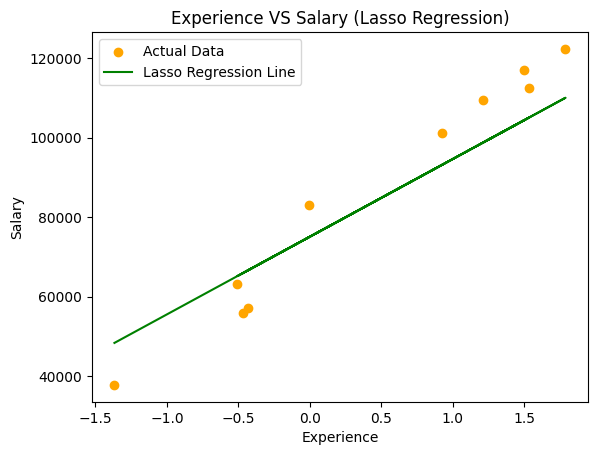

In [74]:
plt.scatter(xtest, ytest, label='Actual Data', color='Orange')
plt.plot(xtest, y_pred, label="Lasso Regression Line", color="Green")
plt.title('Experience VS Salary (Lasso Regression)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [75]:
y_pred = xtest.dot(W) +b

mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error from scratch:", mse)

elastic_built_in = ElasticNet(alpha=0.1)
elastic_built_in.fit(xtrain, ytrain)

y_pred_built_in = elastic_built_in.predict(xtest)

mse = mean_squared_error(ytest, y_pred_built_in)
print("Mean Squared Error built in:", mse)


Mean Squared Error from scratch: 91453913.37635908
Mean Squared Error built in: 26062534.06867128


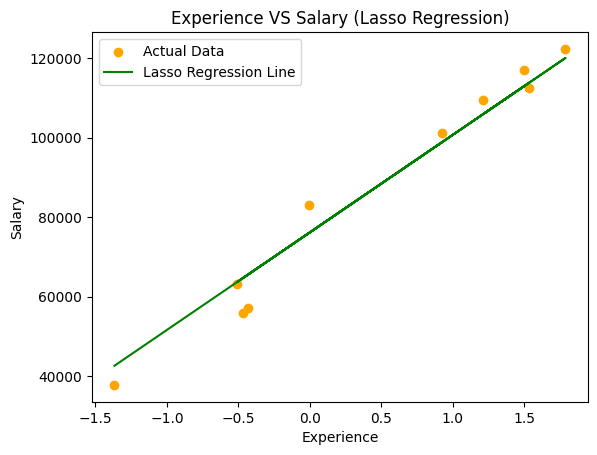

In [76]:
# using built in

ytest_sample = ytest
y_pred_sample = y_pred_built_in

plt.scatter(xtest, ytest_sample, label='Actual Data', color='Orange')
plt.plot(xtest, y_pred_sample, label="Lasso Regression Line", color="Green")
plt.title('Experience VS Salary (Lasso Regression)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [77]:
lambdas = np.logspace(-3, 3, 100)
k = 5

lasso_errors = cross_validate_elastic(X, Y, lambdas, k)

optimal_lambda = lambdas[np.argmin(lasso_errors)]
print(f"Optimal lambda (from-scratch): {optimal_lambda}")

cv_errors = []
scaler = StandardScaler()
X_scaled_sklearn = scaler.fit_transform(X)

for alpha in lambdas:
    elastic_built = ElasticNet(alpha=alpha, max_iter=100)
    scores = cross_val_score(elastic_built, X_scaled_sklearn, Y, cv=k, scoring='neg_mean_squared_error')
    cv_errors.append(-scores.mean())

optimal_lambda_sklearn = lambdas[np.argmin(cv_errors)]
print(f"Optimal lambda (sklearn): {optimal_lambda_sklearn}")

Optimal lambda (from-scratch): 0.001
Optimal lambda (sklearn): 0.07564633275546291


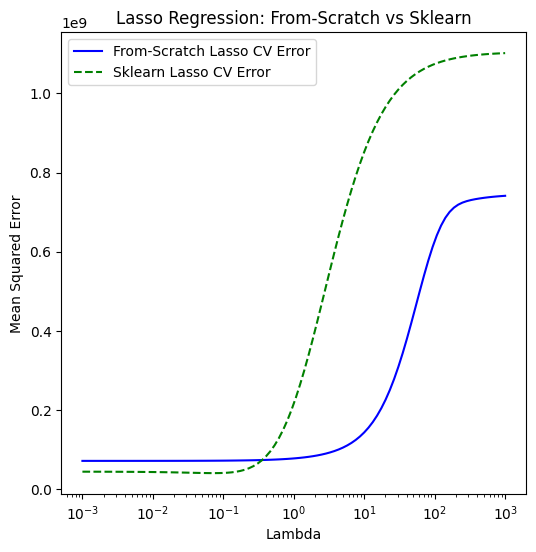

In [78]:
# Plot the cross-validation errors
plt.figure(figsize=(6, 6))
plt.plot(lambdas, lasso_errors, label='From-Scratch Lasso CV Error', color='b')
plt.plot(lambdas, cv_errors, label='Sklearn Lasso CV Error', color='g', linestyle='dashed')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: From-Scratch vs Sklearn')
plt.legend()
plt.show()


dataset 2

In [79]:
df = pd.read_csv('/content/Housing.csv')

In [80]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


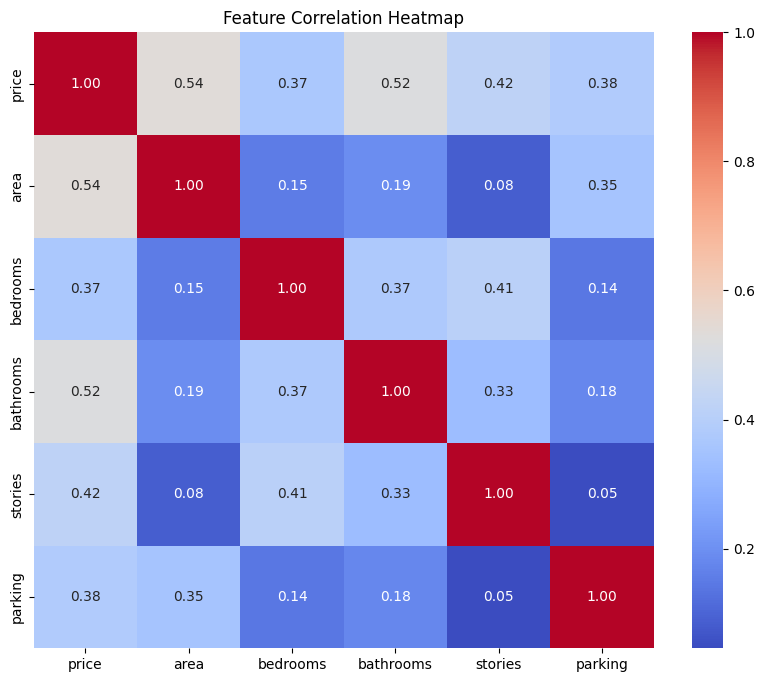

In [81]:
import seaborn as sns
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [82]:
Y = df.iloc[:, 0]
Y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [83]:
Y = Y.to_numpy()

In [84]:
X = df[['area', 'bathrooms','stories','parking','bedrooms']]
X.head()

,area,bathrooms,stories,parking,bedrooms
0,7420,2,3,2,4
1,8960,4,4,3,4
2,9960,2,2,2,3
3,7500,2,2,3,4
4,7420,1,2,2,4


In [85]:
X = X.to_numpy()
X

array([[7420,    2,    3,    2,    4],
       [8960,    4,    4,    3,    4],
       [9960,    2,    2,    2,    3],
       ...,
       [3620,    1,    1,    0,    2],
       [2910,    1,    1,    0,    3],
       [3850,    1,    2,    0,    3]])

In [86]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.04672629,  1.42181174,  1.37821692,  1.51769249,  1.40341936],
       [ 1.75700953,  5.40580863,  2.53202371,  2.67940935,  1.40341936],
       [ 2.21823241,  1.42181174,  0.22441013,  1.51769249,  0.04727831],
       ...,
       [-0.70592066, -0.57018671, -0.92939666, -0.80574124, -1.30886273],
       [-1.03338891, -0.57018671, -0.92939666, -0.80574124,  0.04727831],
       [-0.5998394 , -0.57018671,  0.22441013, -0.80574124,  0.04727831]])

In [87]:
cols = X.shape[1]
cols

5

In [88]:
W = np.zeros(cols)
W

array([0., 0., 0., 0., 0.])

In [89]:
b = 0

In [90]:
xtrain ,xtest, ytrain, ytest = train_test_split(X,Y, test_size=1/3, random_state=0)

In [91]:
W, b = elastic(learning_rate=0.01, alpha=0.2, l1_ratio=0.5, iterations=7000)

In [92]:
y_pred = xtest.dot(W) +b

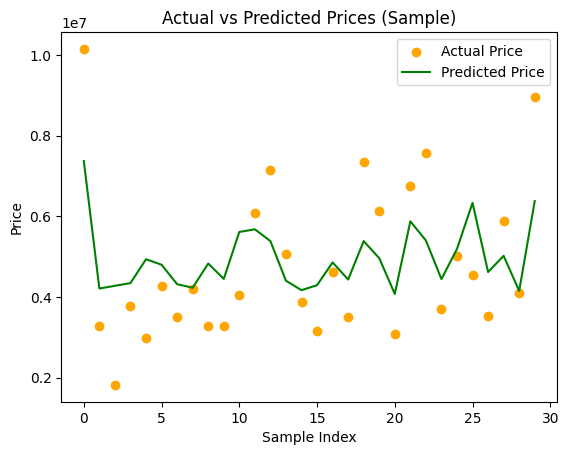

In [93]:
import numpy as np
import matplotlib.pyplot as plt

sample_size = 30
sample_indices = np.random.choice(len(ytest), size=sample_size, replace=False)
ytest_sample = ytest[sample_indices]
y_pred_sample = y_pred[sample_indices]

plt.scatter(range(len(ytest_sample)), ytest_sample, label="Actual Price", color="orange")
plt.plot(range(len(y_pred_sample)), y_pred_sample, label="Predicted Price", color="green")
plt.title('Actual vs Predicted Prices (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [94]:
y_pred = xtest.dot(W) +b

mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error from scratch:", mse)

elastic_built_in = ElasticNet(alpha=0.1)
elastic_built_in.fit(xtrain, ytrain)

y_pred_built_in = elastic_built_in.predict(xtest)

mse = mean_squared_error(ytest, y_pred_built_in)
print("Mean Squared Error built in:", mse)


Mean Squared Error from scratch: 1812655763246.8105
Mean Squared Error built in: 1226726669918.2717


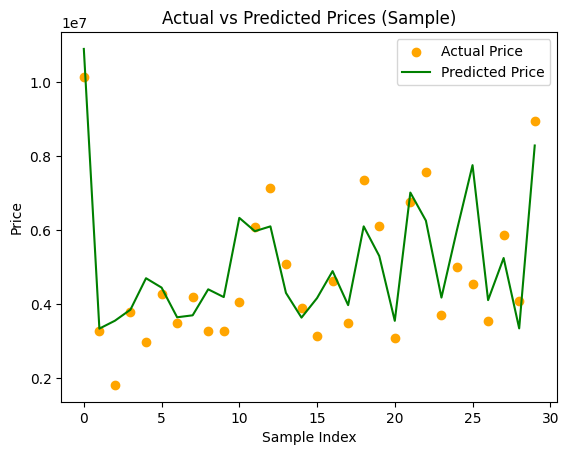

In [95]:
# using built-in function
sample_size = 30

ytest_sample = ytest[sample_indices]
y_pred_sample = y_pred_built_in[sample_indices]

plt.scatter(range(len(ytest_sample)), ytest_sample, label="Actual Price", color="orange")
plt.plot(range(len(y_pred_sample)), y_pred_sample, label="Predicted Price", color="green")
plt.title('Actual vs Predicted Prices (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [96]:
lambdas = np.logspace(-3, 3, 100)
k = 5

elastic_errors = cross_validate_elastic(X, Y, lambdas, k)

optimal_lambda = lambdas[np.argmin(elastic_errors)]
print(f"Optimal lambda (from-scratch): {optimal_lambda}")

cv_errors = []
scaler = StandardScaler()
X_scaled_sklearn = scaler.fit_transform(X)

for alpha in lambdas:
    elastic_model = ElasticNet(alpha=alpha, max_iter=90)
    scores = cross_val_score(elastic_model, X_scaled_sklearn, Y, cv=k, scoring='neg_mean_squared_error')
    cv_errors.append(-scores.mean())

optimal_lambda_sklearn = lambdas[np.argmin(cv_errors)]
print(f"Optimal lambda (sklearn): {optimal_lambda_sklearn}")

Optimal lambda (from-scratch): 0.001
Optimal lambda (sklearn): 0.001


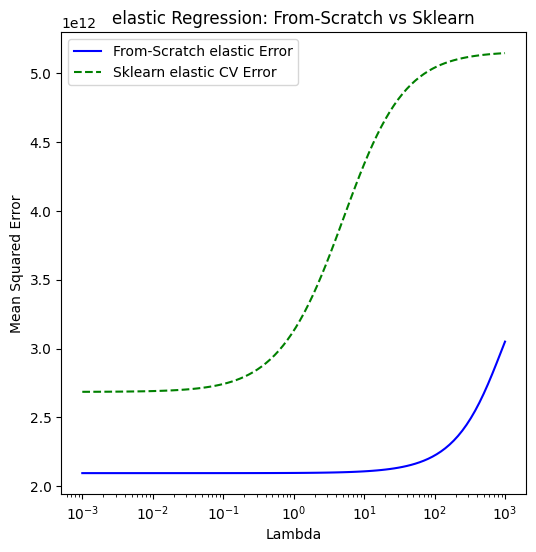

In [97]:

plt.figure(figsize=(6, 6))
plt.plot(lambdas, elastic_errors, label='From-Scratch elastic Error', color='b')
plt.plot(lambdas, cv_errors, label='Sklearn elastic CV Error', color='g', linestyle='dashed')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('elastic Regression: From-Scratch vs Sklearn')
plt.legend()
plt.show()
